In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")
engine


Engine(sqlite:///hawaii.sqlite)

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [11]:
# Reflect to see all the tables and respective columns
from sqlalchemy import inspect
inspector = inspect(engine)

for table_name in inspector.get_table_names():
   print("Table Name: %s" % table_name)
   for column in inspector.get_columns(table_name):
       print("Column: %s" % column['name'])

Table Name: measurement
Column: id
Column: station
Column: date
Column: prcp
Column: tobs
Table Name: station
Column: id
Column: station
Column: name
Column: latitude
Column: longitude
Column: elevation


# Exploratory Climate Analysis

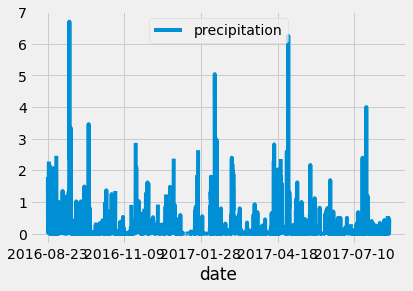

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))
df = df.sort_index()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

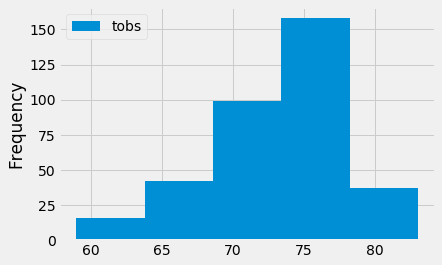

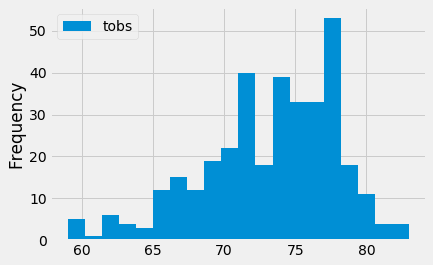

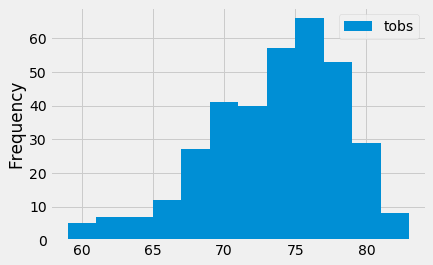

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)
df = pd.DataFrame(results, columns=['tobs'])
#print(df)
#plt.tight_layout()
# When creating a histogram, you’ll need to figure how many bins you need. 
# It’s recommended that you stay within a range of 5 to 20 bins. 
# You may need to play around with the data a bit to find a good fit somewhere between 5 and 20. 
# A “good fit” is one that represents the data well and highlights areas where there is a lot of data and areas where there is not a lot of data. 
# It’s all about finding the right balance.
df.plot.hist(bins=5)
df.plot.hist(bins=20)
# 12 bins is in this case a sweet spot for this data.
df.plot.hist(bins=12)

In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start=None, end=None):

    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]           

    # Check if there is an end date provided
    if not end: 
        # No end data provided
        results = session.query(*sel).\
            filter(Measurement.date <= start).all()
        temps = list(np.ravel(results))
        return temps

    # Assume there is a start and end date
    results = session.query(*sel).\
    filter(Measurement.date >= start).\
    filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))

    return temps

calc_temps('2017-06-01', '2018-06-01')
calc_temps('2010-1-01')

[56.0, 72.44859359844811, 87.0]

# Challenge

In [19]:
# Module 9 Challenge
# Gather data on the seasons of Oahu and determine whether the seasons could affect the surf and ice cream shop business. 
# # Specifically, are there certain times of the year when business might be slower, or the type of customer could be different?
# Find a few key aspects of Oahu’s seasonal weather data because the investors want to ensure that there are enough customers between seasons to sustain the business throughout the year.

# Objectives
# - Determine key statistical data about the month of June.
# - Determine key statistical data about the month of December.
# - Compare your findings between the month of June and December.
# - Make 2 or 3 recommendations for further analysis.
# - Share your findings in the Jupyter Notebook.

# Instructions
# - Identify key statistical data in June and similarly in December across all of the stations and years using the describe() function.
# - Share your findings in the Jupyter Notebook with a few sentences describing the key differences in weather between June and December and 2-3 recommendations for further analysis.



In [20]:
# Design a query to retrieve the available precipitation and temperature data
# Get all the data points available in the database

results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs)
#print(results.all())

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation','temperature'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
#print(df.to_string(index=False))
df

,date,precipitation,temperature
date,,,
2010-01-01,2010-01-01,0.08,65.0
2010-01-01,2010-01-01,0.21,72.0
2010-01-01,2010-01-01,0.15,75.0
2010-01-01,2010-01-01,0.15,70.0
2010-01-01,2010-01-01,0.05,66.0
...,...,...,...
2017-08-22,2017-08-22,0.50,76.0
2017-08-23,2017-08-23,0.00,81.0
2017-08-23,2017-08-23,0.00,82.0


## FOCUS: June & December

In [21]:
# Separate out the June & December data respectively, creating dataframes for each month across all the available years and weather stations.
jun_data = df.loc[(pd.to_datetime(df['date']).dt.month == 6)]
dec_data = df.loc[(pd.to_datetime(df['date']).dt.month == 12)]
jun_data
dec_data

,date,precipitation,temperature
date,,,
2010-12-01,2010-12-01,0.13,70.0
2010-12-01,2010-12-01,0.04,76.0
2010-12-01,2010-12-01,0.76,73.0
2010-12-01,2010-12-01,1.35,72.0
2010-12-01,2010-12-01,1.48,71.0
...,...,...,...
2016-12-31,2016-12-31,0.90,65.0
2016-12-31,2016-12-31,0.36,72.0
2016-12-31,2016-12-31,0.25,67.0


## June

In [40]:
# Use the .describe() function to get the distribution statistics for the JUNE precipitation and temperature measurements/observations

# OBSERVATIONS:

# Precipitation mean is 7 times larger than the median, and the standard deviation is approximately 15 times larger
# - This indicates a small proportion of days with rainfalls substantially larger than the daily median.
# QUESTIONS:
# - Do days with rain, and days with heavier rains discourage surfing?
# - Is there a correlation between rain and heavier rain days and temperature?

# Temperature mean & median are effectively the same, likely implying a normal distribution.
# - There is an 11F difference between the mean/median and the minimum June temperatures, with a SD of just over 3.
# QUESTIONS:
# - If we reasonably assume lower temperatures discourage ice cream sales then at what temperature might sales diminish? 
# - Note the proportion of lower quartile observations plus lower outliers as days with potentially reduced demand
# - On the other end we might reasonably assume higher teperature days driving increased demand?

jun_data.describe()

,precipitation,temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D825D80208>,
      dtype=object)

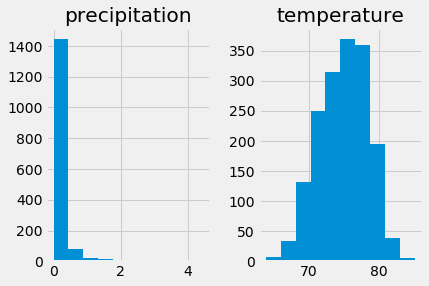

In [41]:
# Create SIDE-BY-SIDE histograms to show the JUNE count for each set of precipitation and temperature measurements

# OBSERVATIONS: 

# Precipitation 
# - it is readily apparent the majoprity of days in June are rain free
# - The relatively small number of larger observations skew the distribution to the RIGHT, across all the available weather stations and years

# Temperature 
# - the mean and median observation is 75F across time & weather stations, and the distribution looks relatively normal

jun_data.hist(bins=10)

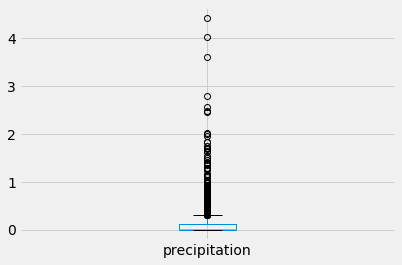

In [42]:
# Create a Box & Whisker plot to show the JUNE distribution of PRECIPITATION measurements

# OBSERVATIONS:

# There are high outliers, that is observations 1.5 times the interquartile range (IQR) above the median
# - The outliers represent a number of days with substantial rainfull in contrast to the larger number of days with no or little rain
# QUESTIONS:
# - What is the proportion of days that are outliers? 
# - This proportion may represent a proportion of days with reduced demand for surfing.
# - Is there a non-zero lower bound for rainfall with regard surfing demand? Or is it a binary no rain = demand, any rain = no demand?
# - Once decided calculate the proportion of demand vs no demand days

jun_data['precipitation'].plot.box()

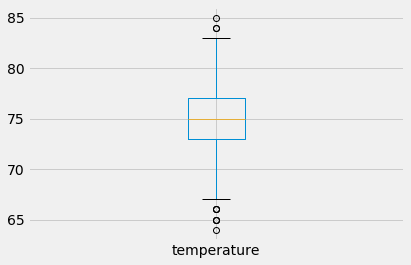

In [53]:
# Create a seperate Box & Whisker plot to show the JUNE distribution of TEMPERATURE measurements

# OBSERVATION: 
# This appears to be a normal distribution around 75F amd very few outliers above and below.
# - Is there a temperature below which there is reduced demand for surfing?
# - Use that temperature to calculate the proportion of demand vs reduced demand days

jun_data['temperature'].plot.box()

## December

In [48]:
# As for the JUNE analysis use .describe() to get a description of the distribution of DECEMBER's precipitation and temperature observations

# OBSERVATIONS:
# Precipitation mean is roughly 7 times larger than the median, and the standard deviation is 18 times larger
# - This indicates a small proporition of days with rainfalls substantially larger than the daily median, simlilar to June
# - The maximum is 2 inches larger than in June
# - There are slightly fewer observations available than in June (1.4k vs 1.6k)

# Temperature mean & median are effectively the same, likely implying a normal distribution.
# - The December Minimum is 15F lower than the Decembermean/median, with an SD of almost 4.
# - The December Minimum is 8F lower than June's minimum
# - There are slightly fewer observations available than in June (1.5k vs 1.7k)

dec_data.describe()

,precipitation,temperature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D827358888>,
      dtype=object)

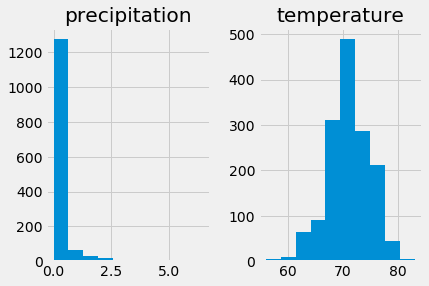

In [54]:
# Create a histogram to show the DECEMBER count and number (as bins) for each set of PRECIPITATION and TEMPERATURE measurements

# OBSERVATION: 

# Precipition - as per June this distribution is skewed to the right
# - December has more days with rain, candidates for reduced surfing demand
# -- Approximately 1.2k no rain observations in December vs 1.4k no rain in June
# - There are days with larger observations than the largest observations in June

# Temperature - as per June the distribution looks relatively normal
# - The mean/median has dropped 4F from 75 to 71, shifting the center of the distribution to the left of the axis
# - More days with lower temperatures hence more candidates for no demand days

dec_data.hist(bins=10)

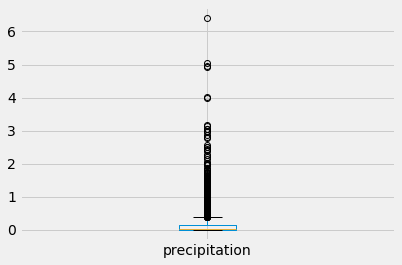

In [56]:
# Create a Box & Whisker plot to show the distribution of PRECIPITATION measurements for DECEMBER

# OBSERVATION: 
# There are outliers 1.5 times the interquartile range (IQR) above the median.
# - The outliers represent a number of days with substantial rainfull in contrast to the larger number of days with no or little rain.
# QUESTIONS:
# - What is the proportion of days that have rain including outliers?
# - This proportion may represent the proportion of days with reduced or  demand for surfing
# - Is there an amount of rain (e.g. days with "light" rain ("light" to be determined)) below which demand for surfing will be unaffected?
# - Or is it simply rain = no demand for surfing?

dec_data['precipitation'].plot.box()

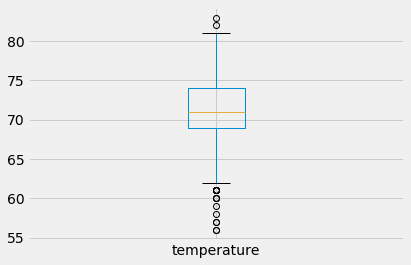

In [57]:
# Create a seperate Box & Whisker plot to show the DECEMBER distribution of TEMPERATURE measurements

# OBSERVATION: 
# This appears to be a normal distribution around 75F, though there are more lower temperature outliers below than in June
# - QUESTIONS:
# - Is there a temperature below which there is reduced demand for surfing?
# - Use that temperature to calculate the proportion of demand vs reduced demand days

dec_data['temperature'].plot.box()

# Recommendations for further analysis

### Assumptions impacting starting a business
- There are enough days in a year with "good" weather to ensure "sufficient" surfing & ice cream demand
    - Why does "enough" days matter? Any weather-dependent business viability projection should incorporate the estimated number of business positive days vs total number of available days in its calculations

### What data is available to analze
- Weather stations make the observations on a daily basis, distributed throughout the area, each contributing daily observations.
- Are there regular differences between the stations in their daily observations? If so are the differences attributible to a weather station's location or collection frequency/
- The observations were made over multiple years
- Are there reliable intra-year patterns?
    - e.g. is June always "better" than December by the same amount?
- Are there discenable inter-year trends?
    - e.g. year over year the observations are the same, or not!

### Based on the initial analysis we recommend the following for further analysis

1. Analyze the June & December precipitation & temperature observations year over year
    - Are the observations in a steady state year-over-year
    - Is there change from one year to the next?
    - If there is change is there a trend, and if so is it predictable or not?
    - Count the number of outliers year over year as a hint regarding predicability
2. Analyze the observations by weather stations in order to consider if observations vary by location
    - Compare the weather stations daily observations, assess if their observations match or vary by location
    - Are there batches or groups of weather stations with more aligned observations, indicating there are area-specific local conditions to consider over the island
        - A local weather pattern, if any, will only be a consideration if there are choices with regard to suitable surfing areas. At the extreme if there is only one area to surf then the calculation becomes one of simply how many good surfing & icrecream days are there in that location.

### Looking at year-over-year weather trends - an example of Recommendation #1

C:\Users\damie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


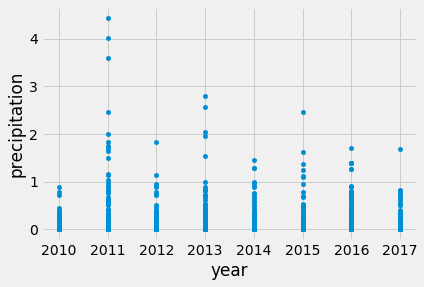

In [59]:
#pd.to_datetime(jul_v['date']).dt.year
jun_data['year'] = pd.to_datetime(jun_data['date']).dt.year
jun_data.plot(x='year',y='precipitation',kind='scatter')

In [60]:
jun_data.groupby('year').describe()

precipitation                                                     \
             count      mean       std  min   25%   50%     75%   max   
year                                                                    
2010         232.0  0.042241  0.112705  0.0  0.00  0.00  0.0300  0.88   
2011         212.0  0.240142  0.595849  0.0  0.00  0.04  0.1625  4.43   
2012         194.0  0.097062  0.223688  0.0  0.00  0.01  0.0950  1.84   
2013         205.0  0.144195  0.378906  0.0  0.00  0.02  0.0800  2.80   
2014         199.0  0.124372  0.240123  0.0  0.00  0.03  0.1400  1.45   
2015         188.0  0.125160  0.300391  0.0  0.00  0.01  0.1150  2.47   
2016         173.0  0.212312  0.327195  0.0  0.01  0.06  0.2800  1.70   
2017         171.0  0.120000  0.217726  0.0  0.00  0.02  0.1500  1.69   

     temperature                                                     
           count       mean       std   min   25%   50%   75%   max  
year                                                                 
2010       242.0  74.925620  2.823039  67.0  73.0  75.0  77.0  85.0  
2011       227.0  73.938326  2.869689  65.0  72.0  74.0  76.0  82.0  
2012       211.0  74.000000  2.865227  68.0  72.0  74.0  76.0  81.0  
2013       217.0  74.599078  3.203094  66.0  72.0  75.0  77.0  81.0  
2014       215.0  75.027907  3.551907  67.0  72.0  75.0  78.0  84.0  
2015       203.0  74.990148  3.583502  66.0  72.0  76.0  78.0  81.0  
2016       194.0  75.175258  3.421996  64.0  73.0  75.5  78.0  81.0  
2017       191.0  77.219895  2.622538  71.0  75.0  77.0  79.0  83.0

In [61]:
jun_data['precipitation'].describe()

count    1574.000000
mean        0.136360
std         0.335731
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.430000
Name: precipitation, dtype: float64

year
2010    [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
2011    [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
2012    [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
2013    [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
2014    [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
2015    [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
2016    [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
2017    [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
dtype: object

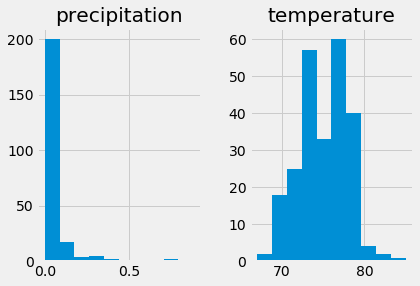

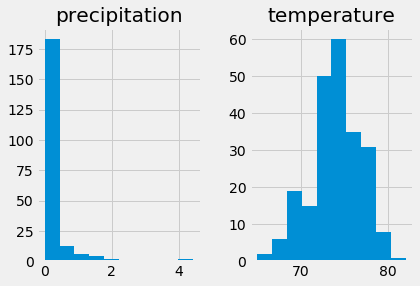

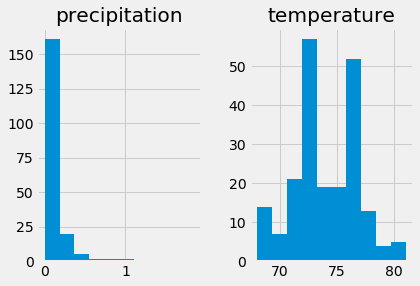

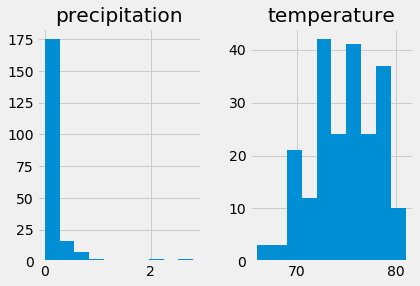

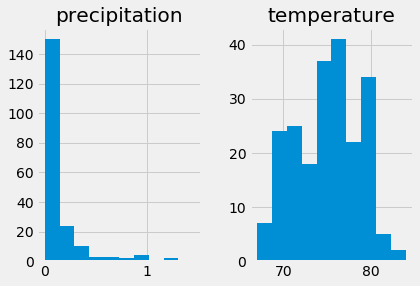

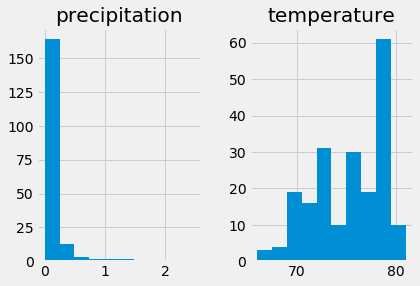

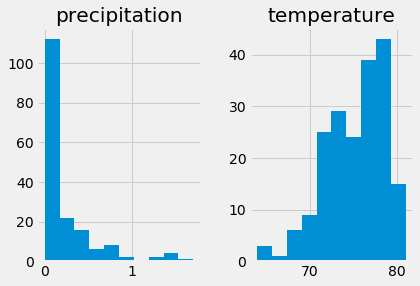

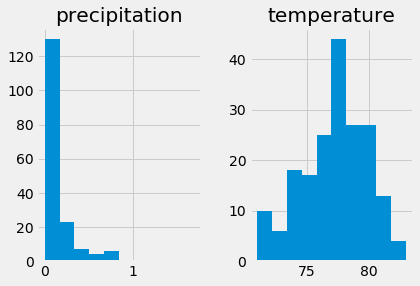

In [63]:
jun_data.groupby('year').hist()